# Data import and test

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [14]:
name_data_file="risk_factors_cervical_cancer"

data = pd.read_csv(f"../raw_data/{name_data_file}.csv", na_values=["?"])

In [15]:
data

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.00,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.00,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
2,34,1.0,NaN,1.0,0.0,0.0,0.0,0.0,0.00,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.00,0.0,...,NaN,NaN,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.00,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,34,3.0,18.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
854,32,2.0,19.0,1.0,0.0,0.0,0.0,1.0,8.00,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
855,25,2.0,17.0,0.0,0.0,0.0,0.0,1.0,0.08,0.0,...,NaN,NaN,0,0,0,0,0,0,1,0
856,33,2.0,24.0,2.0,0.0,0.0,0.0,1.0,0.08,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 858 non-null    int64  
 1   Number of sexual partners           832 non-null    float64
 2   First sexual intercourse            851 non-null    float64
 3   Num of pregnancies                  802 non-null    float64
 4   Smokes                              845 non-null    float64
 5   Smokes (years)                      845 non-null    float64
 6   Smokes (packs/year)                 845 non-null    float64
 7   Hormonal Contraceptives             750 non-null    float64
 8   Hormonal Contraceptives (years)     750 non-null    float64
 9   IUD                                 741 non-null    float64
 10  IUD (years)                         741 non-null    float64
 11  STDs                                753 non-n

In [ ]:
print("Original shape:", data.shape)

# DataFrame w/o missing values and duplicates  
df_clean = data.dropna()
df_clean = df_clean.drop_duplicates()

# shape after cleaning
print("Shape after dropna:", df_clean.shape)

# dropped rows
dropped_rows = data.loc[data.index.difference(df_clean.index)]

print("\n Rows dropped:", dropped_rows.shape[0])
print("\n Head of dropped.rows:")
dropped_rows.head()

Original shape: (858, 36)
Shape after  dropna: (59, 36)

 Rows dropped: 799

 Head of dropped.rows:


,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
2,34,1.0,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,NaN,NaN,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0


In [55]:
df_clean.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
21,41,3.0,17.0,4.0,0.0,0.0,0.0,1.0,10.00,0.0,...,21.0,21.0,0,0,0,0,0,0,0,0
22,40,1.0,18.0,1.0,0.0,0.0,0.0,1.0,0.25,0.0,...,2.0,2.0,0,0,0,0,0,1,1,1
59,35,3.0,17.0,4.0,0.0,0.0,0.0,1.0,7.00,1.0,...,19.0,19.0,0,0,0,0,0,0,0,0
68,35,3.0,20.0,2.0,0.0,0.0,0.0,0.0,0.00,1.0,...,3.0,3.0,0,0,0,0,0,0,0,0
78,35,3.0,17.0,6.0,1.0,13.0,2.6,1.0,7.00,0.0,...,12.0,12.0,0,0,0,0,0,1,0,0


In [40]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 59 entries, 21 to 831
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 59 non-null     int64  
 1   Number of sexual partners           59 non-null     float64
 2   First sexual intercourse            59 non-null     float64
 3   Num of pregnancies                  59 non-null     float64
 4   Smokes                              59 non-null     float64
 5   Smokes (years)                      59 non-null     float64
 6   Smokes (packs/year)                 59 non-null     float64
 7   Hormonal Contraceptives             59 non-null     float64
 8   Hormonal Contraceptives (years)     59 non-null     float64
 9   IUD                                 59 non-null     float64
 10  IUD (years)                         59 non-null     float64
 11  STDs                                59 non-null   

In [42]:
print(df_clean.columns)

Index(['Age', 'Number of sexual partners', 'First sexual intercourse',
       'Num of pregnancies', 'Smokes', 'Smokes (years)', 'Smokes (packs/year)',
       'Hormonal Contraceptives', 'Hormonal Contraceptives (years)', 'IUD',
       'IUD (years)', 'STDs', 'STDs (number)', 'STDs:condylomatosis',
       'STDs:cervical condylomatosis', 'STDs:vaginal condylomatosis',
       'STDs:vulvo-perineal condylomatosis', 'STDs:syphilis',
       'STDs:pelvic inflammatory disease', 'STDs:genital herpes',
       'STDs:molluscum contagiosum', 'STDs:AIDS', 'STDs:HIV',
       'STDs:Hepatitis B', 'STDs:HPV', 'STDs: Number of diagnosis',
       'STDs: Time since first diagnosis', 'STDs: Time since last diagnosis',
       'Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 'Dx', 'Hinselmann', 'Schiller',
       'Citology', 'Biopsy'],
      dtype='object')


In [ ]:
# count how many numerical and categorical variables there are
num_cols = df_clean.select_dtypes(include=['int64', 'float64']).columns
cat_cols = df_clean.select_dtypes(include=['object']).columns

print(f"Number of numerical variables: {len(num_cols)}")
print("Numerical variables:", list(num_cols))

print(f"\nNumber of categorical variables: {len(cat_cols)}")
print("Categorical variables:", list(cat_cols))


Number of numerical variables: 36
Numerical variables: ['Age', 'Number of sexual partners', 'First sexual intercourse', 'Num of pregnancies', 'Smokes', 'Smokes (years)', 'Smokes (packs/year)', 'Hormonal Contraceptives', 'Hormonal Contraceptives (years)', 'IUD', 'IUD (years)', 'STDs', 'STDs (number)', 'STDs:condylomatosis', 'STDs:cervical condylomatosis', 'STDs:vaginal condylomatosis', 'STDs:vulvo-perineal condylomatosis', 'STDs:syphilis', 'STDs:pelvic inflammatory disease', 'STDs:genital herpes', 'STDs:molluscum contagiosum', 'STDs:AIDS', 'STDs:HIV', 'STDs:Hepatitis B', 'STDs:HPV', 'STDs: Number of diagnosis', 'STDs: Time since first diagnosis', 'STDs: Time since last diagnosis', 'Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 'Dx', 'Hinselmann', 'Schiller', 'Citology', 'Biopsy']

Number of categorical variables: 0
Categorical variables: []


In [43]:
df_clean.describe(include='all')

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
count,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.00000,59.000000,59.000000,...,59.000000,59.000000,59.000000,59.0,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000
mean,27.457627,2.711864,17.050847,2.525424,0.271186,2.314135,0.694292,0.59322,1.948983,0.152542,...,6.101695,6.016949,0.016949,0.0,0.016949,0.016949,0.067797,0.186441,0.118644,0.152542
std,8.090697,1.426967,2.944450,1.454552,0.448388,4.736601,1.603797,0.49545,2.996554,0.362632,...,6.016342,6.061443,0.130189,0.0,0.130189,0.130189,0.253555,0.392805,0.326145,0.362632
min,15.000000,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,1.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,2.000000,15.000000,1.500000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,2.000000,1.500000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,28.000000,3.000000,17.000000,2.000000,0.000000,0.000000,0.000000,1.00000,0.250000,0.000000,...,4.000000,3.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,33.500000,3.000000,19.000000,3.500000,1.000000,1.266973,0.125000,1.00000,3.000000,0.000000,...,8.000000,8.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,49.000000,7.000000,28.000000,6.000000,1.000000,16.000000,7.000000,1.00000,12.000000,1.000000,...,22.000000,22.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


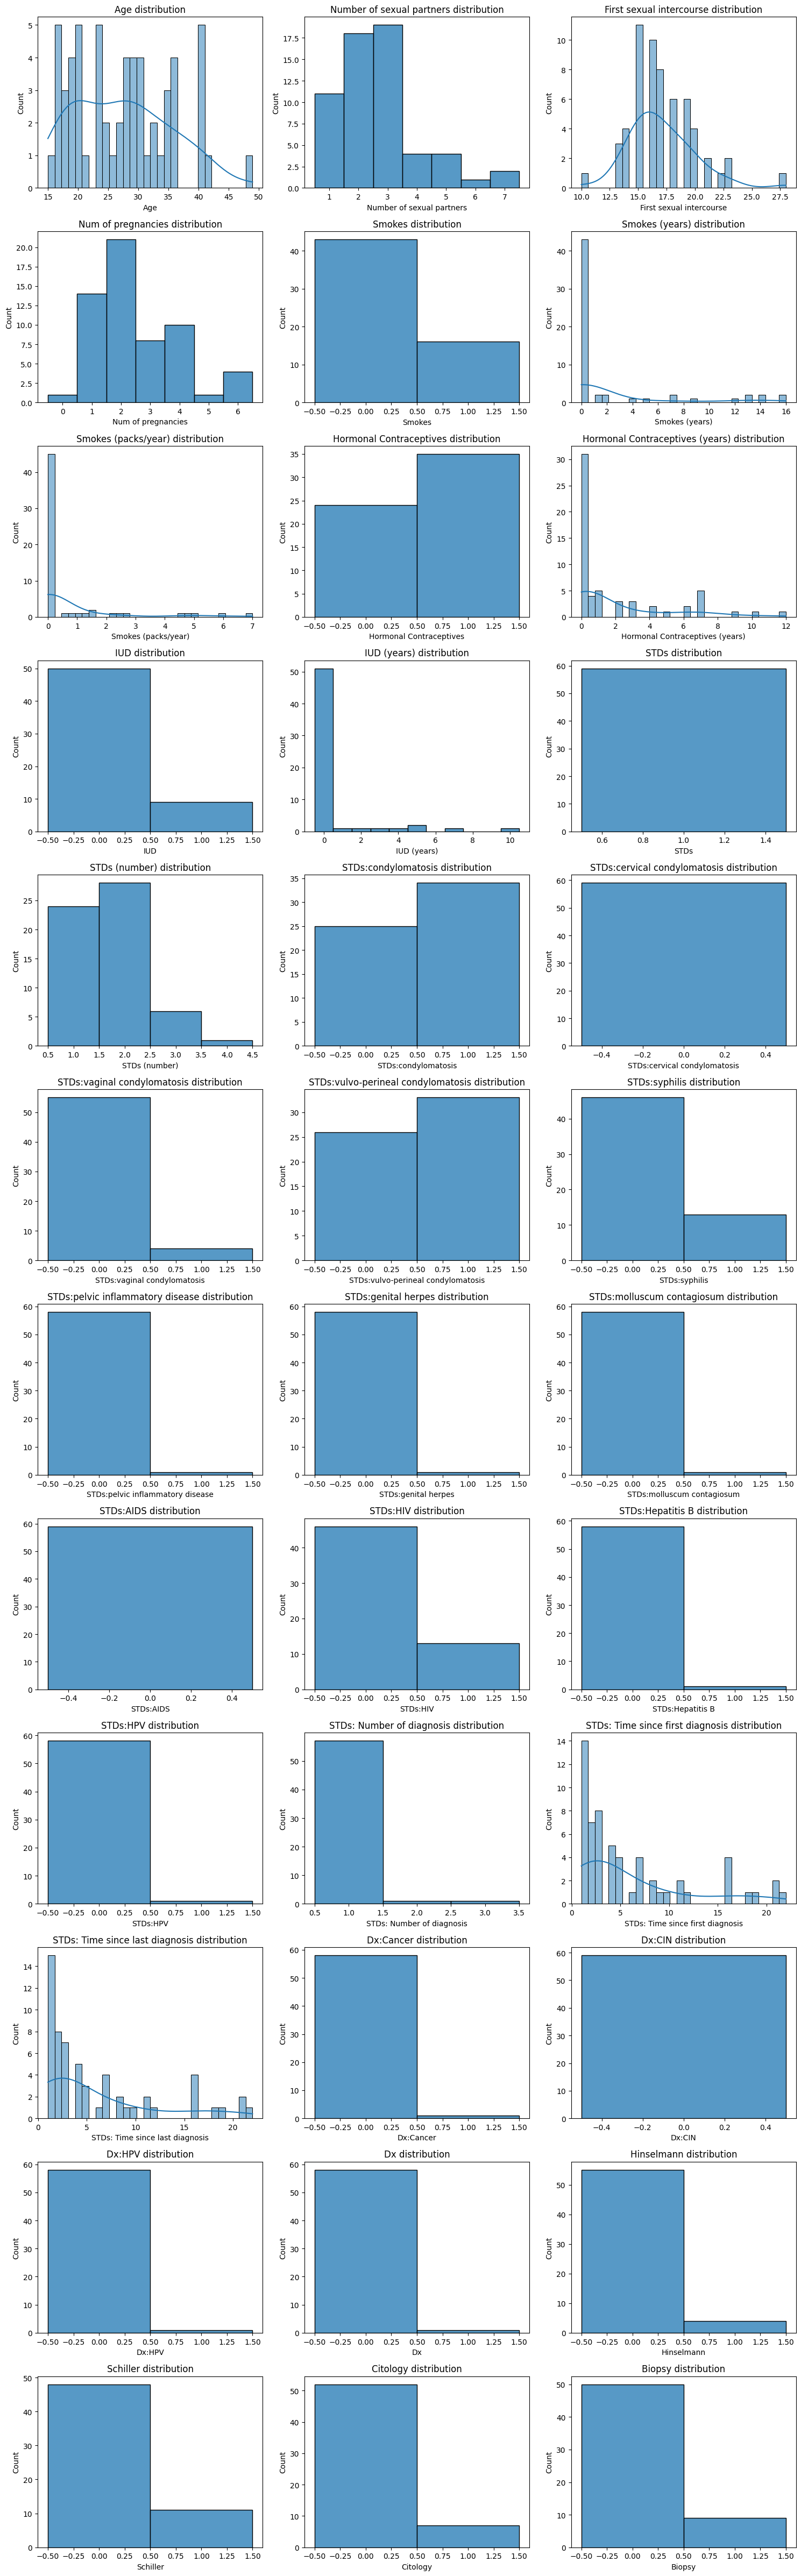

In [54]:
# numerical features
num_cols = df_clean.select_dtypes(include=['int64', 'float64']).columns
n_num = len(num_cols)

if n_num > 0:
    rows = math.ceil(n_num / 3)
    fig, axes = plt.subplots(rows, 3, figsize=(15, 4*rows))
    axes = axes.flatten()

    for i, col in enumerate(num_cols):
        # Count unique values (ignoring NaN)
        nunique = df_clean[col].nunique(dropna=True)
        
        # If binary or low-cardinality numeric feature: use discrete bins
        if nunique <= 10:
            sns.histplot(df_clean[col], discrete=True, ax=axes[i])
        else:
            # Otherwise use a standard histogram with KDE
            sns.histplot(df_clean[col], kde=True, bins=30, ax=axes[i])

        axes[i].set_title(f"{col} distribution")

    # Remove empty axes if grid > number of features
    for j in range(i+1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

# for categorical features
cat_cols = df_clean.select_dtypes(include=['object']).columns
n_cat = len(cat_cols)

if n_cat > 0:
    rows = math.ceil(n_cat / 3)
    fig, axes = plt.subplots(rows, 3, figsize=(15, 4*rows))
    axes = axes.flatten()

    for i, col in enumerate(cat_cols):
        # Bar plot of value counts
        df_clean[col].value_counts().plot(kind='bar', ax=axes[i])
        axes[i].set_title(f"{col} frequency")

    # Remove empty axes if grid > number of features
    for j in range(i+1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()